# Instead of an input layer, how about a single recurrent network with certain starting conditions?

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pandas as pd


In [535]:

T = 50 # miliseconds of simulation time
start_time=0
end_time=100
T = end_time - start_time
inp_num = int(7000*0.8)
rec_num = int(7000*0.8)
inh_num = int(7000*0.2)
nrns = np.array((rec_num*[1]+inh_num*[2]))

inh_duration = 1
rec_delay_range=(1,51)
rec_event_thresh=20
inh_event_thresh=20
combination_samples=1
inh_weight = 3
inp_weight = 1
V_k = -50

params = {
    'T' : T, # miliseconds of simulation time
    'start_time':start_time,
    'end_time':end_time,
    'inp_num' : inp_num,
    'rec_num' : rec_num,
    'inh_num' : inh_num,
    'inh_duration' : inh_duration,
    'rec_delay_range':rec_delay_range,
    'inp_event_thresh':rec_event_thresh,
    'inh_event_thresh':inh_event_thresh,
    'inh_weight':inh_weight,
    'inp_event':inp_weight,
    'combination_samples':combination_samples
}

In [437]:
np.ceil(np.random.lognormal(mean=1.5,sigma=1,size=100))

array([ 7., 12.,  2.,  7.,  6., 18., 12.,  3., 30.,  5., 18., 17.,  5.,
        4.,  9.,  1.,  4.,  8.,  1., 14.,  2.,  4.,  3.,  4.,  8.,  3.,
        8.,  4., 13.,  6., 10.,  4.,  4.,  2.,  8.,  6.,  4.,  9., 20.,
        7.,  3.,  7.,  1., 10.,  5.,  9., 24.,  1., 16.,  2.,  1.,  4.,
        5.,  4.,  7.,  5., 28.,  3.,  2.,  4.,  4.,  4., 16.,  8.,  2.,
        1., 20.,  2., 10.,  2.,  5.,  3., 19.,  9., 16.,  8., 37.,  4.,
        5.,  5.,  6., 15.,  3.,  2.,  3.,  2.,  2.,  4.,  3.,  4., 12.,
        5.,  5.,  7.,  1.,  3.,  4.,  6.,  7.,  4.])

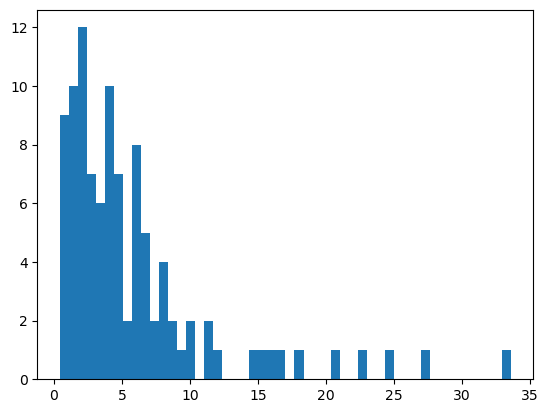

In [438]:
plt.figure()
plt.hist(np.random.lognormal(mean=1.5,sigma=1,size=100),bins=50)
plt.show()

In [349]:
from itertools import product 

l1, l2 = np.arange(*inp_delay_range), np.arange(*inp_delay_range)
permutations = np.array(list(product(l1, l2)))
permutation_samples = permutations.shape[0]

In [350]:
np.array(permutations).shape[0]

900

In [351]:
ls = [np.arange(*inp_delay_range) for k in range(inp_num)]
# np.array(list(product(ls)))
ls

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7

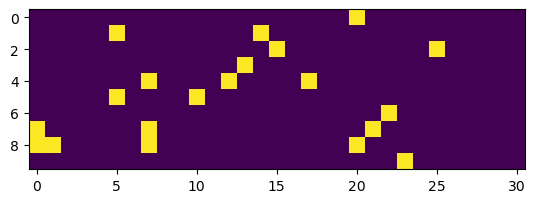

In [356]:
anchor_spikes = np.random.rand((inp_num*rec_delay_range[1]))
idc = np.argsort(anchor_spikes)[:num_anchor_spikes]
anchor_spikes = np.zeros_like(anchor_spikes)
anchor_spikes[idc] = 1
anchor_spikes = anchor_spikes.reshape(inp_num, rec_delay_range[1])
plt.figure()
plt.imshow(anchor_spikes)

In [536]:
rec_delays = np.random.randint(*rec_delay_range,(rec_num+inh_num,rec_num+inh_num))

from itertools import product

trials = 1


anchor_neurons = np.arange(0,rec_num)
np.random.shuffle(anchor_neurons)
anchor_neurons = anchor_neurons[:inp_num]

all_anchor_spikes = np.zeros((trials,inp_num, rec_delay_range[1]))

for trial_ in range(trials):

    num_anchor_spikes = 50 #np.random.randint(len(anchor_spikes))
    anchor_spikes = np.random.rand((inp_num*rec_delay_range[1]))
    idc = np.argsort(anchor_spikes)[:num_anchor_spikes]
    anchor_spikes = np.zeros_like(anchor_spikes)
    anchor_spikes[idc] = 1
    anchor_spikes = anchor_spikes.reshape(inp_num, rec_delay_range[1])

    all_anchor_spikes[trial_,...] = anchor_spikes
    
    
all_events = np.zeros((trials, T,rec_num+inh_num))
all_inh_events = np.zeros((trials, T, inh_num))



In [537]:
all_events = np.zeros((trials, T,rec_num+inh_num))


In [539]:
t

39

In [538]:
for l,anchor_spikes in enumerate(tqdm(all_anchor_spikes)):
    events = np.zeros((all_events.shape[1:]))
#     events[:rec_delay_range[1],anchor_neurons] = anchor_spikes.T
    inh_events = all_inh_events[l,...]
    for t in range(0,end_time):
        for j in range(rec_num):
            I = 0
            if t != 0 and events[t-1,j] == 1:
                I= V_k
            for i in range(rec_num+inh_num):
                if i!=j: # no autaptic connections
                    I += events[t-rec_delays[i,j],i]

            if I>=rec_event_thresh:
                events[t,j] =1 
            else:
                events[t,j] =0

        for j in range(rec_num,rec_num+inh_num):
            I = 0
            if t != 0 and events[t-1,j] !=0:
                I= V_k
                
            for i in range(rec_num):
                if i!=j:
                    I += events[t-rec_delays[i,j],i]


            if I>inh_event_thresh:
                events[t,j] =-inh_weight
            else:
                events[t,j] =0
        if t < rec_delay_range[1]:
            events[t,anchor_neurons] = anchor_spikes.T[t,:]
        
    all_events[l,...] = events

  0%|                                                                                            | 0/1 [41:12<?, ?it/s]
Traceback (most recent call last):
  File "C:\Users\miles\anaconda3\envs\mysnn\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\miles\AppData\Local\Temp\ipykernel_6912\1374112161.py", line -1, in <module>
KeyboardInterrupt


Unexpected exception formatting exception. Falling back to standard exception



During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\miles\anaconda3\envs\mysnn\Lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\miles\anaconda3\envs\mysnn\Lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\miles\anaconda3\envs\mysnn\Lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\miles\anaconda3\envs\mysnn\Lib\site-packages\IPython\core\ultratb.py", line 1052, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
                

In [ ]:
all_events.shape

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(np.where(all_events[-1])[0],np.where(all_events[-1])[1],alpha=0.5)
plt.scatter(np.where(anchor_spikes)[1],anchor_neurons[np.where(anchor_spikes)[0]],alpha=0.5) 
plt.show()

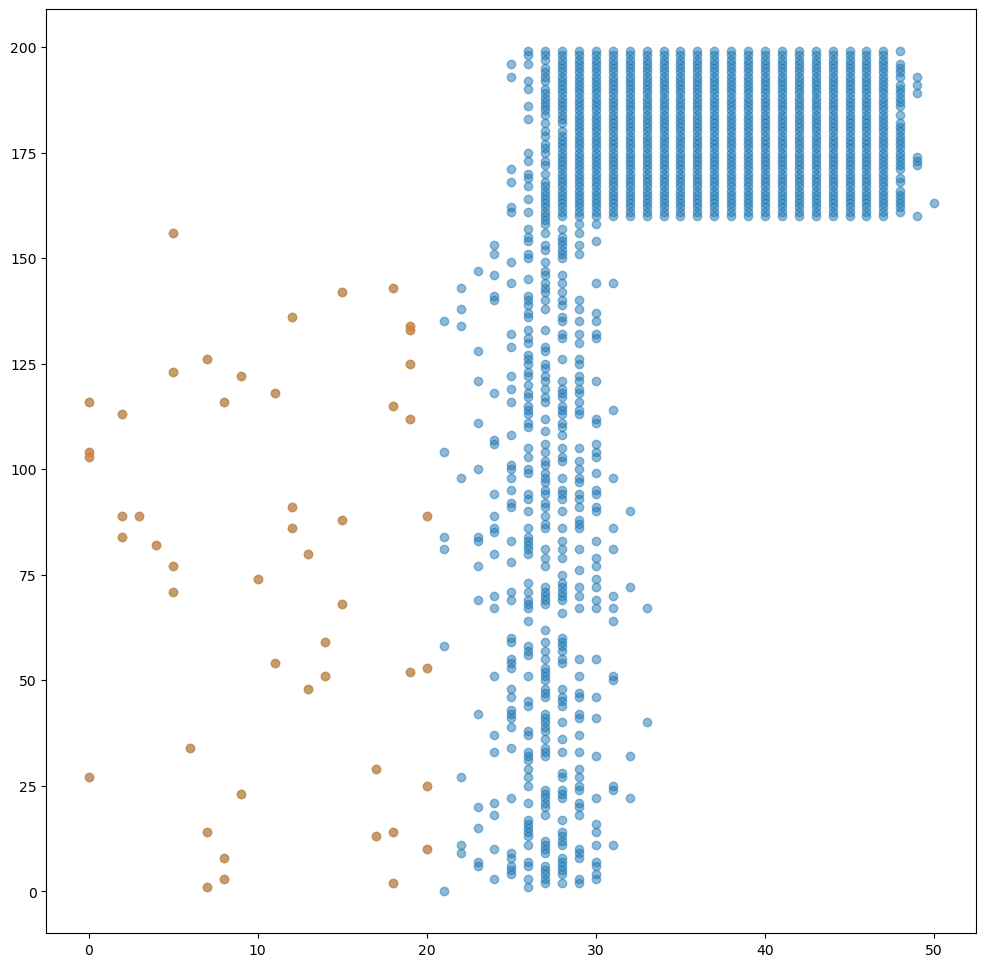

In [488]:
plt.figure(figsize=(12,12))
plt.scatter(np.where(all_events[-1])[0],np.where(all_events[-1])[1],alpha=0.5)
plt.scatter(np.where(anchor_spikes)[1],anchor_neurons[np.where(anchor_spikes)[0]],alpha=0.5) 
plt.show()

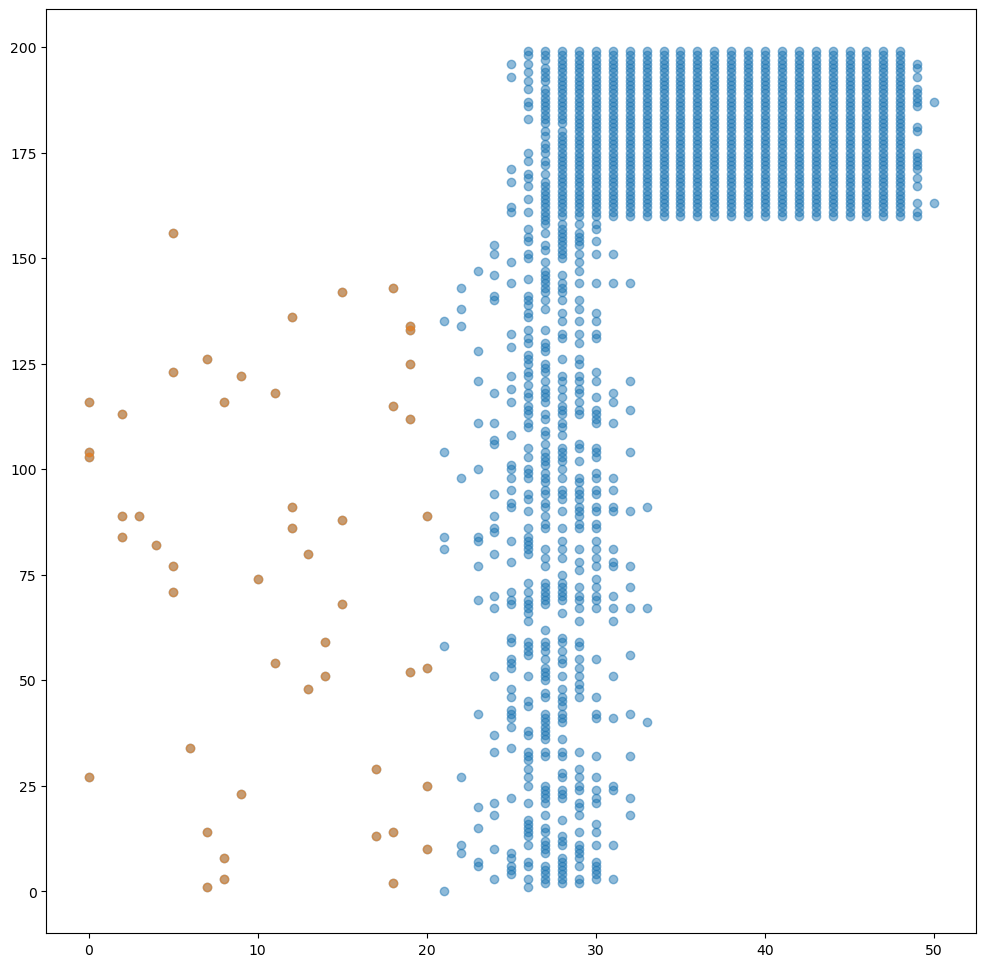

In [484]:
plt.figure(figsize=(12,12))
plt.scatter(np.where(all_events[-1])[0],np.where(all_events[-1])[1],alpha=0.5)
plt.scatter(np.where(anchor_spikes)[1],anchor_neurons[np.where(anchor_spikes)[0]],alpha=0.5) 
plt.show()

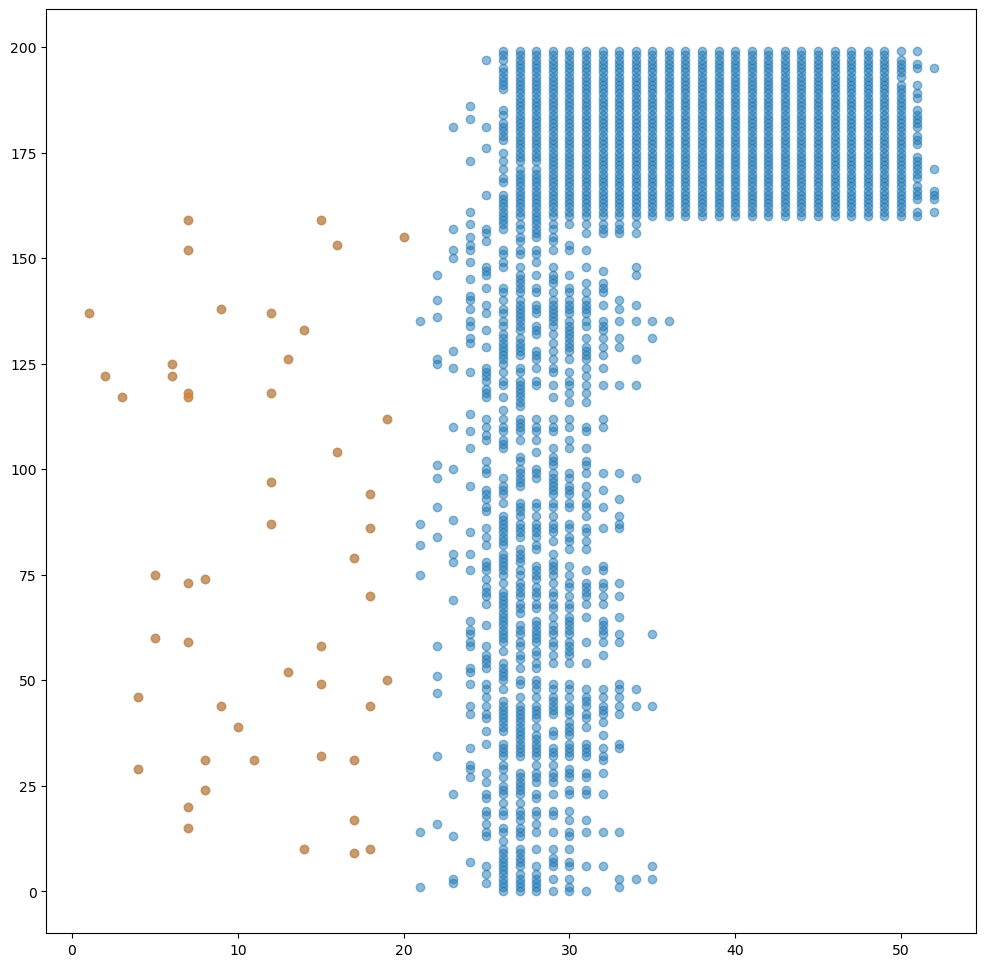

In [478]:
plt.figure(figsize=(12,12))
plt.scatter(np.where(all_events[-1])[0],np.where(all_events[-1])[1],alpha=0.5)
plt.scatter(np.where(anchor_spikes)[1],anchor_neurons[np.where(anchor_spikes)[0]],alpha=0.5) 
plt.show()

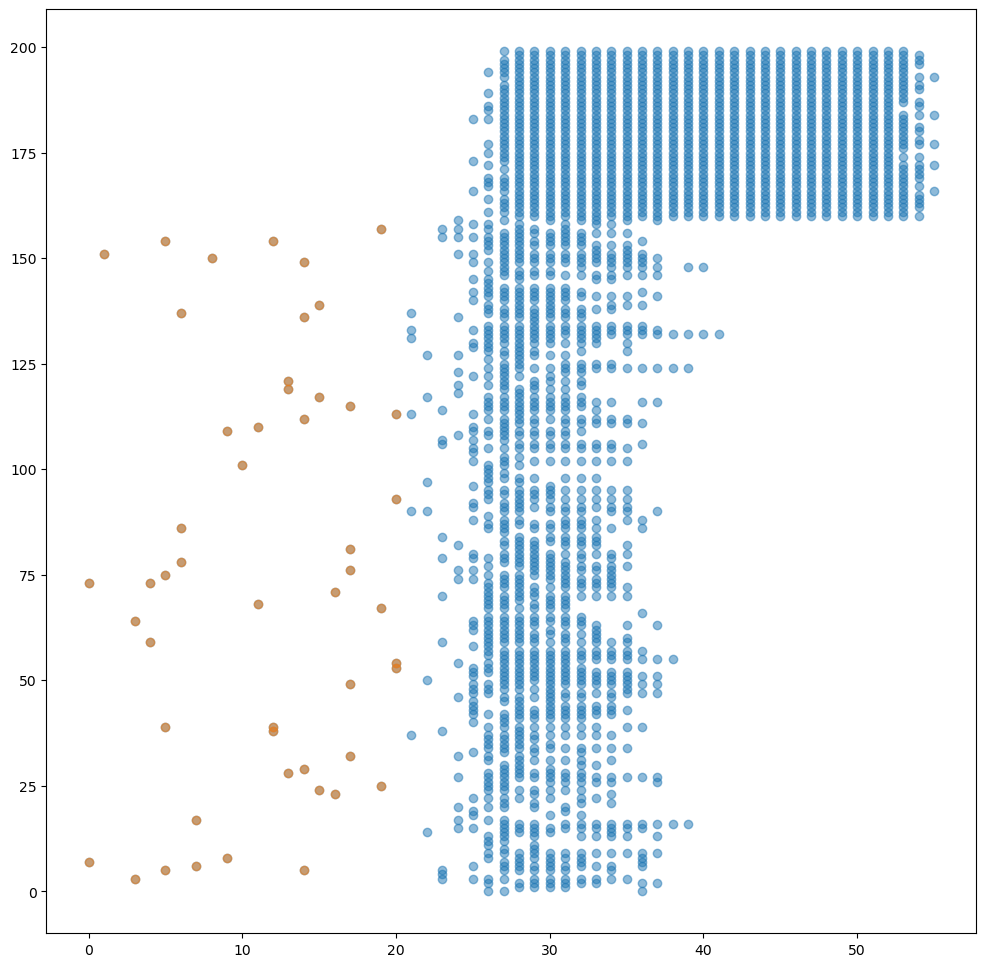

In [469]:
plt.figure(figsize=(12,12))
plt.scatter(np.where(all_events[-1])[0],np.where(all_events[-1])[1],alpha=0.5)
plt.scatter(np.where(anchor_spikes)[1],anchor_neurons[np.where(anchor_spikes)[0]],alpha=0.5) 
plt.show()

# First question, what amount of neurons do I need in the reservoir to get X% specificity in the output representation?

In [191]:
colors = ['#1f77b4']*inp_num + ['#d62728']*rec_num + ['#17becf']*inh_num
colors

['#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d

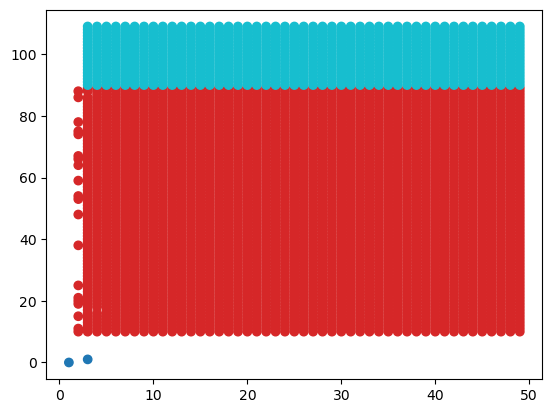

In [192]:
plt.figure()
i = 2
events = all_events[i,...]
palette = [colors[k] for k in np.where(events)[1]]
plt.scatter(np.where(events)[0], np.where(events)[1],c=palette)
plt.show()